# TD6 - question 1 : champignons

# Crédits:

### Aboubacar TUO

In [1]:
# Importing required Libraries and the dataset

import pandas as pd
pd.set_option('display.width', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn-bright','classic'])

a) Le but est d'identifier si un champignon est comestible ou pas, à partir de certaines informations (features ou attributs) données sur ces champignons. On souhaite que l'algorithme fonctionne y compris sur des champignons dont l'espèce n'était pas présente dans le training set.

b) C'est une tâche de classification binaire, car on a que deux classes ici (contrairement à de la classification multi-classe par exemple). 

c) Tout les attributs sont catégoriels. Il faudra penser à les encoder sous forme de one-hot vectors. Comme tous sont catégoriels, c'est pratique, on pourra appliquer les mêmes types de pré-traitement à tous les attributs. 

d) La plupart des algorithmes de classification peuvent être utilisés ici. Toutefois, les attributs étant catégoriels, les algorithmes basés sur des arbres de décision peuvent être efficaces, a priori (ou par dessus, des méthodes ensemblistes avec vote.. on en parlera plus tard).

e) Il est dit dans l'énoncé que les classes ne sont pas équilibrées. Il faudra donc veiller à ce que la classe "poisonous" soit suffisamment représentée ! En fait, ici, le "coût" d'un faux négatif (prédire que c'est comestible alors que ça ne l'est pas) est immensément plus "cher" (mourrir?) que le coût d'un faux positif (se priver d'un bon petit champignon commestible, par erreur).

## Exploration des données

### Aperçu des données

In [2]:
data = pd.read_csv('mushrooms.csv')
data.head(15)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [3]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
subset = ['class', 'cap-shape','cap-surface','cap-color','bruises','odor','gill-size', 'gill-color', 'stalk-shape', 'stalk-root',]
print(data[subset].head(5).to_latex())

\begin{tabular}{lllllllllll}
\toprule
{} & class & cap-shape & cap-surface & cap-color & bruises & odor & gill-size & gill-color & stalk-shape & stalk-root \\
\midrule
0 &     p &         x &           s &         n &       t &    p &         n &          k &           e &          e \\
1 &     e &         x &           s &         y &       t &    a &         b &          k &           e &          c \\
2 &     e &         b &           s &         w &       t &    l &         b &          n &           e &          c \\
3 &     p &         x &           y &         w &       t &    p &         n &          n &           e &          e \\
4 &     e &         x &           s &         g &       f &    n &         b &          k &           t &          e \\
\bottomrule
\end{tabular}



### Vérification de valeurs manquantes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data.isnull().sum() 

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

On voit ici qu'il n'y aucune valeur maquante dans les attributs. **Attention ça arrive souvent qu'on n'ait pas certaines valeurs pour certains attributs.**

Si le cas se présente, il faut : 
- soit éliminer les lignes concernées, 
- soit mettre des valeurs arbitraires, à choisir, si on ne veut pas perdre trop de données. Il est d'usage de prendre 
    - la moyenne 
    - (ou la médianne) pour les attributs numériques, 
    - ou encore de les fixer à une valeur choisie (zéro par exemple); 
    
    ce choix dépend surtout du contexte d'application (connaissance experte)


#### decribe

La commande "describe" est assez magique.. elle calcule des fréquences, 
ou des stats plus quantitatives, selon les données présentes

In [7]:
data.describe(include = 'all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


On converti les classes "e" et "p" en 1 ou 0 (0=poisonous)

In [8]:
data['class'] = np.where(data['class']=='e',1,0)
data.head(15)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,1,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,1,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,1,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,0,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,1,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [9]:
data.shape

(8124, 23)

### Visualisation de la fréquence d'apparition (d'une valeur) d'attribut (par classe)

In [10]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [11]:
## on enlève "class" des features, car c'est justement le label "y" à prédire.
features = list(data.columns[1:])
# features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
#        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
#        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
#        'stalk-surface-below-ring', 'stalk-color-above-ring',
#        'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
#        'ring-type', 'spore-print-color', 'population', 'habitat']

/home/flandes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/flandes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


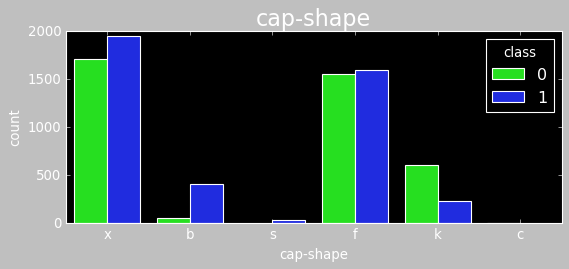

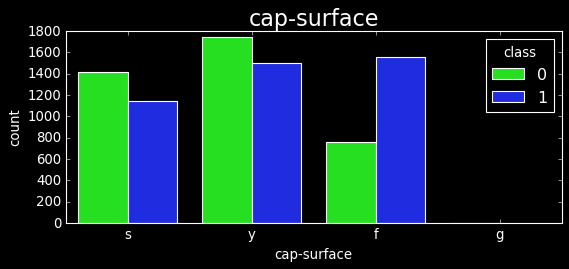

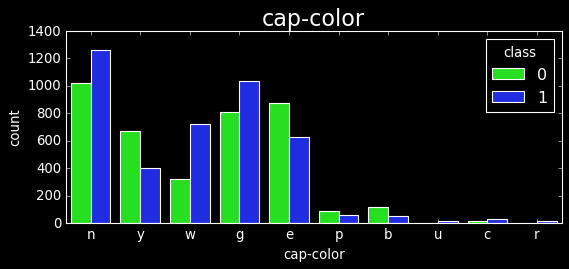

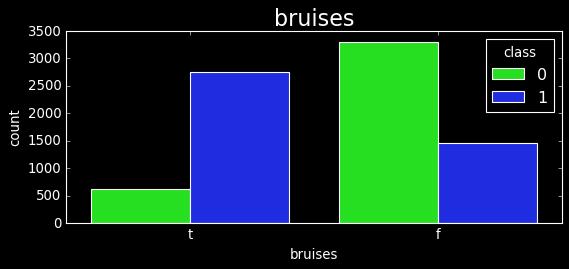

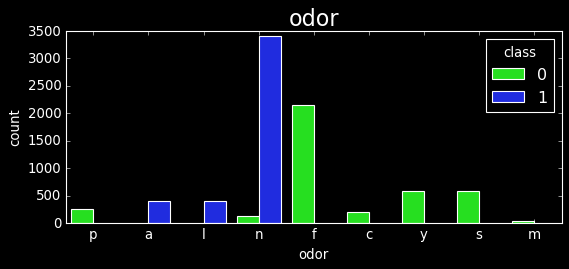

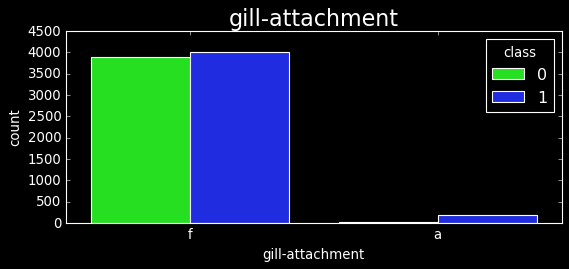

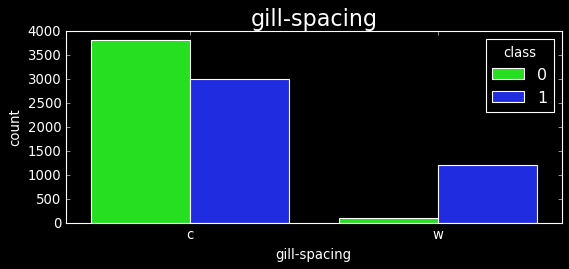

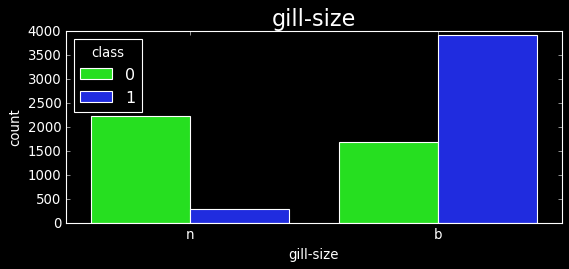

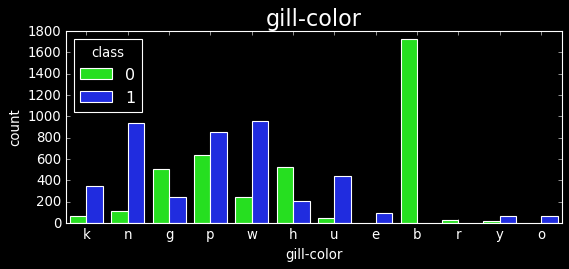

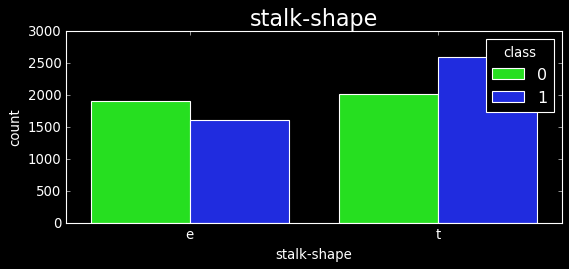

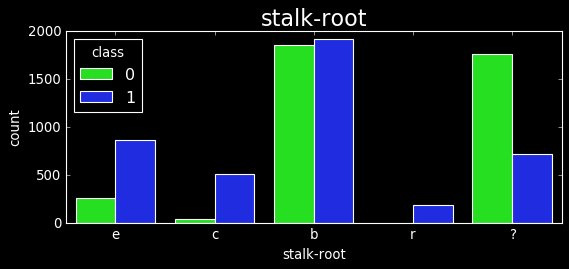

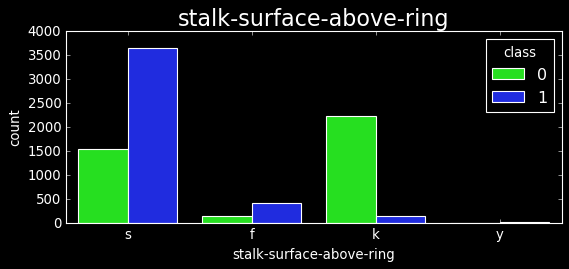

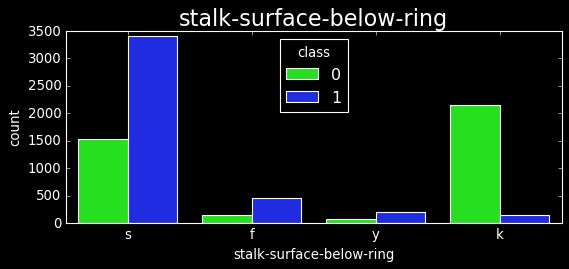

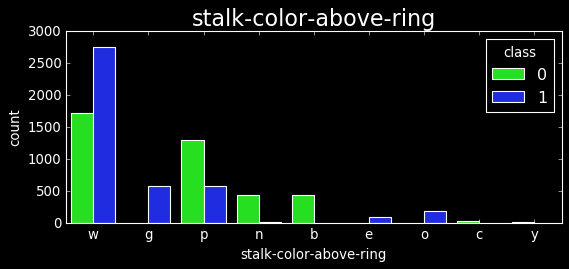

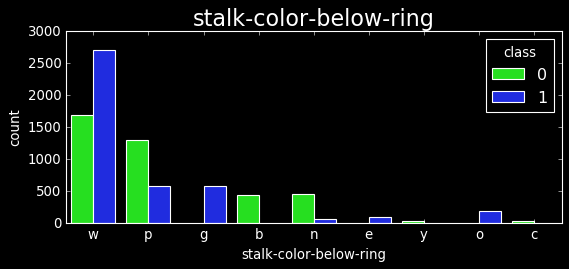

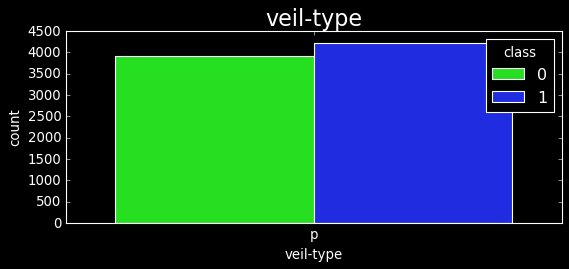

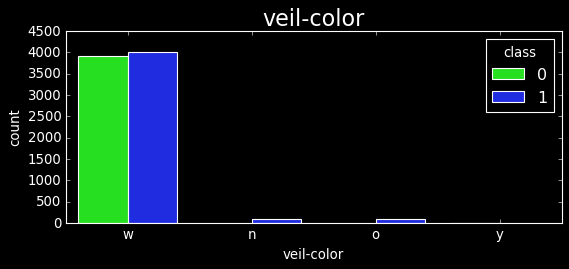

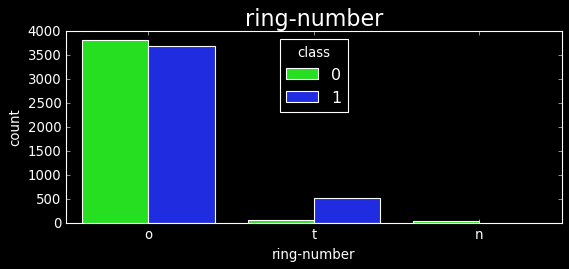

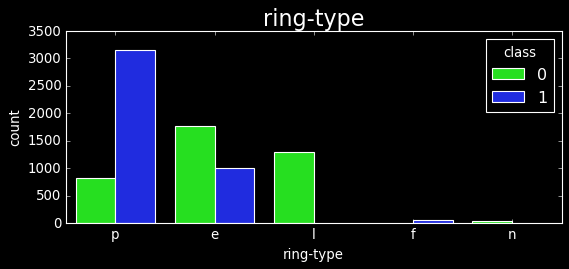

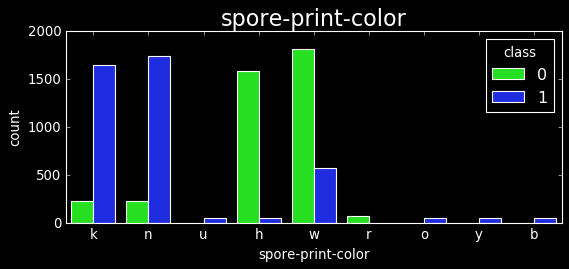

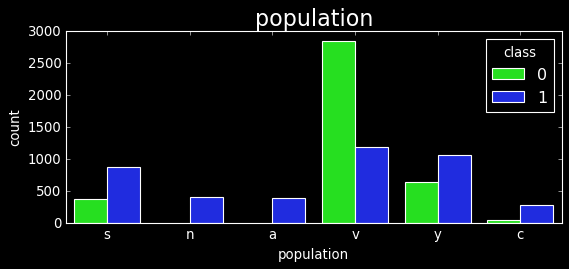

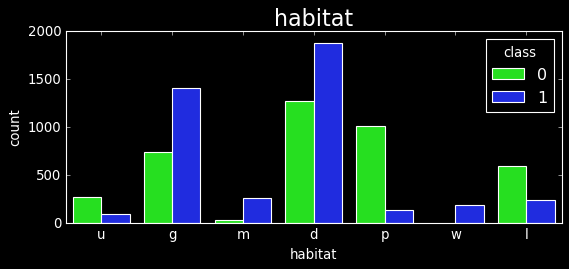

In [12]:
for i in features:
    plt.figure(figsize=(8,3))
    plt.style.use(['seaborn-bright','dark_background'])
    sns.countplot(x = data[i],data = data, hue = 'class', palette='hsv')
    plt.title(i,fontsize=20,color='w')

## Pré-traitements indispensables

### Séparation attributs/labels

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

In [14]:
## on divise les données (data) entre les attributs, qui sont les entrée (attributs=features en anglais)
## et de l'autre coté, les labels à prédire ("les y")
x = data.drop(columns='class')
y = data['class']
x.shape, y.shape

((8124, 22), (8124,))

In [15]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [16]:
y

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int64

### Encodage one-hot

#### Observation: 

La commande `OneHotEncoder().fit_transform(x)` fait la chose suivante:
en partant d'un point de donnée de taille 22 (22 attributs, vecteur de taille 22), on obtient un vecteur de taille 117 (c'est la somme du nombre différentes de valeurs possibles pour chacun des attributs)

In [17]:
x_onehot = OneHotEncoder().fit_transform(x)
x_onehot.shape  #la shape obtenue est un peu étonnante

(8124, 117)

In [18]:
# data_dummies = pd.get_dummies(x) #  La commande `get_dummies` de pandas fait la meme chose.. MAIS :
# print(data_dummies.shape)
# data_dummies
# # Le OneHotEncoder transforme cette immense matrice en matrice creuse (sparse matrix en anglais)
# x_onehot = OneHotEncoder().fit_transform(data_dummies)  #il ne faut pas le faire 2 fois de suite..
# x_onehot.shape  #la shape obtenue est un peu étonnante

In [19]:
## on vérifie facilement que pour chaque point de donnée (chaque champignon),
## la somme des valeurs du vecteur fait bien 22 
## (car au total chaque attribut doit bien avoir une de ses valeurs "allumée")
x_onehot[:,:].sum(axis=1) 

matrix([[22.],
        [22.],
        [22.],
        ...,
        [22.],
        [22.],
        [22.]])

In [20]:
x_onehot

<8124x117 sparse matrix of type '<class 'numpy.float64'>'
	with 178728 stored elements in Compressed Sparse Row format>

In [21]:
print(x_onehot[0]) ## là, print() ne montre que les indices des valeurs non nulles, dans la matrice creuse.

  (0, 5)	1.0
  (0, 8)	1.0
  (0, 14)	1.0
  (0, 21)	1.0
  (0, 28)	1.0
  (0, 32)	1.0
  (0, 33)	1.0
  (0, 36)	1.0
  (0, 41)	1.0
  (0, 49)	1.0
  (0, 54)	1.0
  (0, 58)	1.0
  (0, 62)	1.0
  (0, 71)	1.0
  (0, 80)	1.0
  (0, 82)	1.0
  (0, 85)	1.0
  (0, 88)	1.0
  (0, 94)	1.0
  (0, 97)	1.0
  (0, 107)	1.0
  (0, 115)	1.0


### Division en train/test set.

(avec sklearn)

In [22]:
from sklearn.model_selection import train_test_split

## on prend 80% pour le train+validation set, 20% pour le test (tout a la fin !)
x_train, x_test, y_train, y_test = train_test_split(x_onehot.toarray(), y, test_size=0.2, random_state = 101)

## on prend 20% du 80% pour le validation set
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2, random_state = 101)

In [23]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((5199, 117), (1300, 117), (5199,), (1300,))